In [11]:
from sklearn.model_selection import train_test_split
import torch
import torchvision.utils 
from torch.utils.data import DataLoader, Dataset
import cv2

In [43]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import os

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

def img_loader(filename):
    return cv2.resize(cv2.imread(filename, cv2.IMREAD_GRAYSCALE), (32,32))

data = ImageFolder(root='./faces/', loader=img_loader, transform=transform)
data.classes


['an2i',
 'at33',
 'boland',
 'bpm',
 'ch4f',
 'cheyer',
 'choon',
 'danieln',
 'glickman',
 'karyadi',
 'kawamura',
 'kk49',
 'megak',
 'mitchell',
 'night',
 'phoebe',
 'saavik',
 'steffi',
 'sz24',
 'tammo']

In [44]:

# Split dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print( f"training set: {len(train_data)} testing set: {len(test_data)}")

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


training set: 1497 testing set: 375


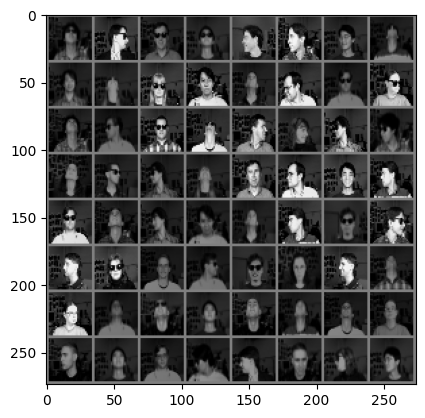

6


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(len(test_loader))


### Define the LeNet-5 Architecture

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)  # Assuming 20 classes for different expressions/poses

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = LeNet5()


### Train the model

In [45]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
image_count = 0
# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        image_count += labels.size(0)
        if image_count % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{image_count + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
print('Finished Training')


Epoch [4/100], Step [5900/24], Loss: 0.0002
Epoch [8/100], Step [10800/24], Loss: 0.0000
Epoch [12/100], Step [17300/24], Loss: 0.0001
Epoch [16/100], Step [23800/24], Loss: 0.0002
Epoch [20/100], Step [28700/24], Loss: 0.0000
Epoch [24/100], Step [35200/24], Loss: 0.0001
Epoch [28/100], Step [41700/24], Loss: 0.0001
Epoch [32/100], Step [46600/24], Loss: 0.0000
Epoch [36/100], Step [53100/24], Loss: 0.0001
Epoch [40/100], Step [59600/24], Loss: 0.0001
Epoch [44/100], Step [64500/24], Loss: 0.0000
Epoch [48/100], Step [71000/24], Loss: 0.0001
Epoch [52/100], Step [77500/24], Loss: 0.0001
Epoch [56/100], Step [82400/24], Loss: 0.0000
Epoch [60/100], Step [88900/24], Loss: 0.0001
Epoch [64/100], Step [95400/24], Loss: 0.0001
Epoch [67/100], Step [100300/24], Loss: 0.0001
Epoch [72/100], Step [106800/24], Loss: 0.0000
Epoch [76/100], Step [113300/24], Loss: 0.0001
Epoch [84/100], Step [124700/24], Loss: 0.0000
Epoch [88/100], Step [131200/24], Loss: 0.0001
Epoch [92/100], Step [137700/24]

### Evaluate the model

In [47]:
# Evaluation
model.eval()
correct = 0
total = 0
counter = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        counter +=1

print(f'Accuracy of the network on the test images: {100 * correct / total}%')
print(f'Correct: {correct} Total: {total}')


Accuracy of the network on the test images: 99.73333333333333%
Correct: 374 Total: 375
